# L2 Proximal - comparison of solvers

This notebooks compares different solvers that can be used to evaluate the proximal of the L2 norm

In [37]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.utils.wavelets import *

from pyproximal.proximal import *
from pyproximal.optimization.primal import *

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
tau = 4.
x = np.arange(-5, 5, 0.1)
nx = len(x)
ny = nx * 2
A = np.random.normal(0, 1, (ny, nx))

Aop = MatrixMult(A)
Aop.explicit = False

# Legacy
l2 = L2(Op=Aop, b=np.ones(ny), solver="legacy", niter=100)
xp = l2.prox(x, tau)

# CG
l21 = L2(Op=Aop, b=np.ones(ny), solver="cg", niter=100)
xp1 = l21.prox(x, tau)

# CGLS
l22 = L2(Op=Aop, b=np.ones(ny), solver="cgls", niter=100)
xp2 = l22.prox(x, tau)

(-0.1, 0.1)

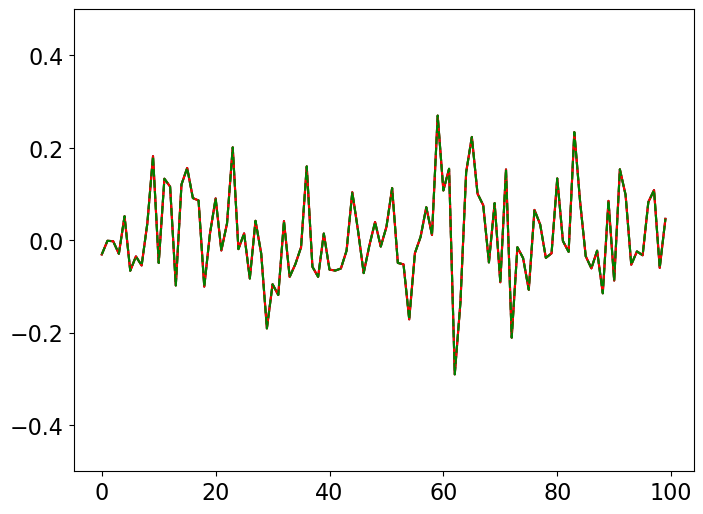

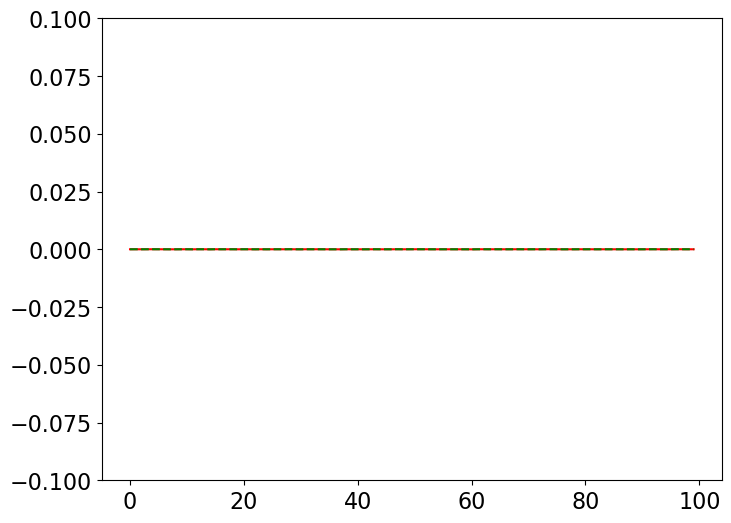

In [ ]:
plt.figure()
plt.plot(xp, 'k')
plt.plot(xp1, 'r')
plt.plot(xp2, '--g')
plt.ylim(-.5, .5)

plt.figure()
plt.plot(xp-xp1, 'r')
plt.plot(xp-xp2, '--g')
plt.ylim(-.1, .1);